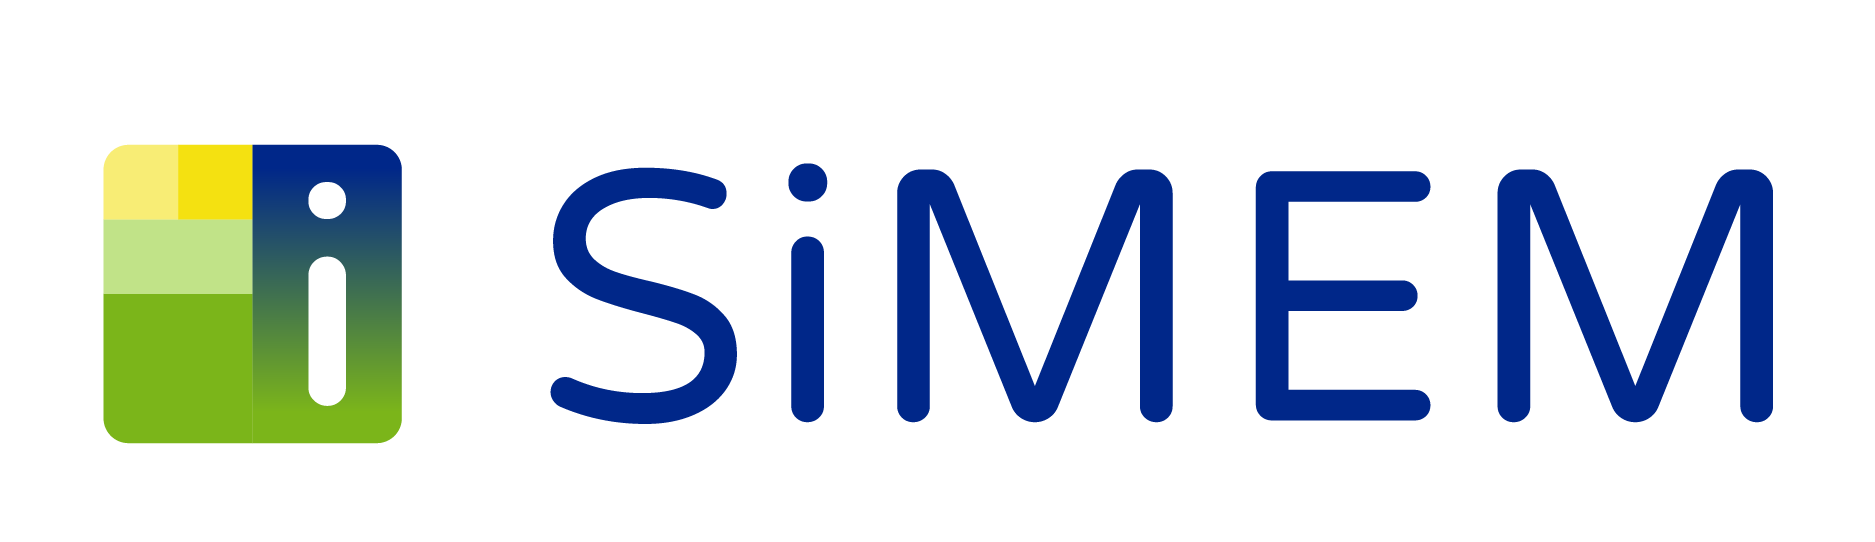

[SiMEM](https://www.simem.co/)

## Caso de uso - Proyecciones de Cantidades y precios en contratos de energía del Mercado Mayorista para el mercado Regulado


# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)


<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías


In [2]:
import sys
from pydataxm.pydatasimem import ReadSIMEM, VariableSIMEM
import pandas as pd
import datetime as dt
from datetime import timedelta

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Cantidades y precios en contratos de energía del Mercado Mayorista por comercializador](https://www.simem.co/datadetail/d316478b-b8c0-4050-49ec-08dce7ce0b90).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [3]:
id_dataset = '8d10e6'                                       # ID del conjunto de datos a consultar las proyecciones de contratos
fecha_inicial = '2025-06-01'                                # Fecha de inicio del rango de consulta
fecha_final = '2030-05-31'                                  # Fecha de fin del rango de consulta
simem = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                                   # Ejecución del método principal para obtener los datos en un DataFrame
display(df_dataset.head(20))                                # Visualización de las primeras 20 filas del DataFrame


****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.011960268020629883
Extraccion de registros: 6.584400653839111
End of data extracting process
****************************************************************************************************


,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP
0,2025-01-01,2027-05-01,GNCC,Regulado,SICEP,4.152976e+07,307.6700
1,2025-01-01,2027-05-01,GNCC,No Regulado,Negociación Bilateral,5.717914e+07,278.3032
2,2025-01-01,2027-05-01,GECG,No Regulado,Negociación Bilateral,7.440000e+07,248.4326
3,2025-01-01,2027-05-01,GECC,No Regulado,Negociación Bilateral,1.107522e+08,290.6120
4,2025-01-01,2027-05-01,GCMG,No Regulado,Negociación Bilateral,2.400000e+01,231.9203
5,2025-01-01,2027-05-01,GASC,No Regulado,Negociación Bilateral,1.915016e+08,286.9420
6,2025-01-01,2027-05-01,GAPC,No Regulado,Negociación Bilateral,4.882500e+06,282.0567
7,2025-01-01,2027-05-01,GAPC,No Regulado,SICEP,5.343569e+05,272.4301
8,2025-01-01,2027-05-01,FREC,No Regulado,Negociación Bilateral,6.996003e+06,300.2936
9,2025-01-01,2027-05-01,FERG,No Regulado,Negociación Bilateral,5.203598e+06,271.0151


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

## Análisis de cantidades proyectadas por Agente Comprador por mecanismo, expresadas en GWh-mes

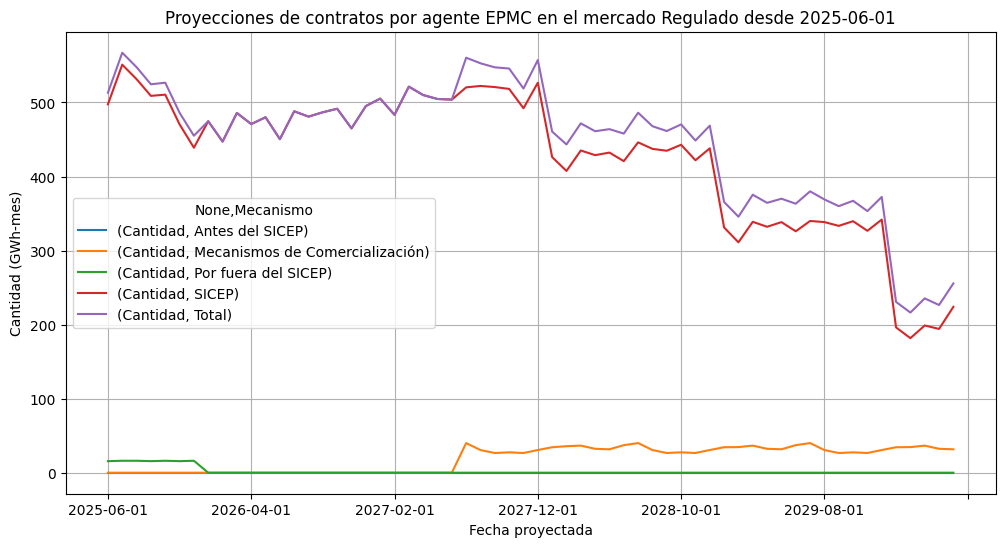

In [4]:
codigo_agente = 'EPMC'                    # Código del agente comprador a filtrar
tipo_mercado = 'Regulado'                 # Selecciona el mercado que se desea analizar [Regulado/ No Regulado]
fecha_publicacion = '2025-06-01'          # Fecha de publicación de las proyecciones a filtrar
df_por_agente = df_dataset.query('FechaPublicacion==@fecha_publicacion & TipoMercado==@tipo_mercado').pivot_table(columns=['Mecanismo'],index=['FechaProyectada','CodigoAgenteComprador'],values=['Cantidad'],aggfunc={'Cantidad':'sum'},margins=True,margins_name='Total',fill_value=0).query("CodigoAgenteComprador==@codigo_agente").div(1000000).reset_index(level='CodigoAgenteComprador',drop=True) # Crea la tabla de datos
df_por_agente.plot(kind='line',title=f'Proyecciones de contratos por agente {codigo_agente} en el mercado {tipo_mercado} desde {fecha_publicacion}',ylabel='Cantidad (GWh-mes)',xlabel='Fecha proyectada',figsize=(12, 6),grid=True,legend=True); # Visualización de la gráfica de proyecciones de contratos por agente

<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

## Análisis de precios proyectadas por Agente Comprador por mecanismo, expresadas en COP/kWh

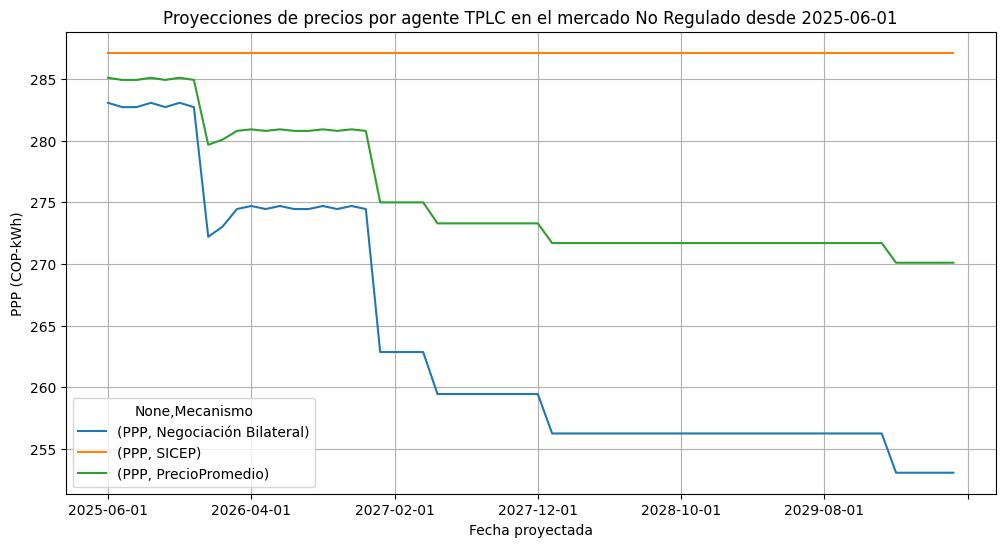

In [5]:
codigo_agente = 'TPLC'               # Código del agente comprador a filtrar
tipo_mercado = 'No Regulado'         # Selecciona el mercado que se desea analizar [Regulado/ No Regulado]
fecha_publicacion = '2025-06-01'     # Fecha de publicación de las proyecciones a filtrar
df_por_agente_ppp = df_dataset.query('FechaPublicacion==@fecha_publicacion & TipoMercado==@tipo_mercado').pivot_table(columns=['Mecanismo'],index=['FechaProyectada','CodigoAgenteComprador'],values=['PPP'],aggfunc={'PPP':'mean'},margins=True,margins_name='PrecioPromedio',fill_value=0).query("CodigoAgenteComprador==@codigo_agente").reset_index(level='CodigoAgenteComprador',drop=True) # Crea la tabla de datos
df_por_agente_ppp.plot(kind='line',title=f'Proyecciones de precios por agente {codigo_agente} en el mercado {tipo_mercado} desde {fecha_publicacion}',ylabel='PPP (COP-kWh)',xlabel='Fecha proyectada',figsize=(12, 6),grid=True,legend=True);  # Visualización de la gráfica de proyecciones de contratos por agente